In [1]:
import numpy as np
import matplotlib
#allow for latex markup in matplotlib figures
matplotlib.rcParams['text.usetex'] = False
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap


#Import a few utility functions...
import sys  
from pathlib import Path
sys.path.insert(0, "../comm_channel")
sys.path.insert(0, "../polling_systems")
sys.path.insert(0, "../geometry")
sys.path.insert(0, "../utils")

#So we can import my local libs
import CommChannel as CC
import qos
import pointcloud as PC
import TSPN
import PollingSystem as PS
import MarkovianRP as MRP
import dtr
import motion

import sim_template as sim
from importlib import reload 

In [2]:
#setup quality of service requirements using reasonable values
F5GHz, F2_4GHz = 5, 2.4 #typical wifi frequencies are 2.4, 5, and sometiems 6 GHz
MOBILE_TX_POWER = qos.Pwr(20)#100-200mW (20-23 dBm) pretty typical, with 1W (30dBm) the absolute maximum
print(MOBILE_TX_POWER)
r = 8#any of 2, 4, 6, or 8
rx_noise = qos.Pwr(-85)#based on Yan and MostofiTWC13 #1e-10#
print(rx_noise)
BER = 1e-6
GAMMA_TH = qos.QoSReq(BER, r, rx_noise).thresholdChannelGain(MOBILE_TX_POWER)
print(GAMMA_TH)
print('SNR Threshold: %d'%(GAMMA_TH+MOBILE_TX_POWER.dBm - rx_noise.dBm))

20.000000 dBm	-10.000000 dBW	100.000000 mW	0.100000 W
-85.000000 dBm	-115.000000 dBW	0.000000 mW	0.000000 W
-71.8297512825111
SNR Threshold: 33


In [8]:
#Setup the communication environment:

#For now, use same channel params
nPL = 5.3
kPL = -20

decorrSH = 2.09  
alpha = 16
sigmaSH = np.sqrt(alpha)
psdAtFC = 30

lam = 0.125
kRic = 10
decorrMP = 0.4*lam         
corrMP = 1
#sigmaMP = 3
sigmaMP = 1.5


#12 remote stations
l = 11
qBase = np.array([[2,6],[21,3],
                 [16,11],[28,23],
                 [10,22],[11,39],
                 [30, 11],[48, 8],
                 [18, 36],[35, 41]])#,
                 #[32, 33],[48, 25]])

sub_regions = [[25,0,10,0],
               [30,10, 25, 9],
               [20,0, 40, 17],
               [50, 25, 15, 3],
               [38, 15, 45, 27]]#,
               #[50, 30, 40, 20]]


x_max = 50
x_min = 0
y_max = 50
y_min = 0
region = [x_max, x_min, y_max, y_min]


cps = [CC.ChannelParams(qBase[i], nPL, kPL, sigmaSH, decorrSH, decorrMP, lam,
                      kRic, corrMP, psdAtFC, sigmaMP) for i in range(len(qBase))]



#res = 2/decorrMP
res = 10
n = 5
p_th = 0.5

#Polling System Setup
bandwidth = 2#leave bandwidth in MHz*1000000#give ourselfes 2MHz of BW
beta = 1/(r*bandwidth)
print(beta)
els = [0.1/beta, 0.2/beta, 0.01/beta, 0.05/beta, 0.02/beta]#, 0.1/beta]
print(els)

0.0625
[1.6, 3.2, 0.16, 0.8, 0.32]


In [4]:
reload(sim)
ccs, cfs, true_joint_con_fields, tjcps = sim.create_channels(cps, region, res, GAMMA_TH, sub_regions)

Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.
Generating shadowing...
Shadowing generation complete.
Generating MP...
MP generation complete.


In [5]:
reload(sim)
pcs, pfs, pjcps, prob_pred_con = sim.predict_channels(res, ccs, true_joint_con_fields, GAMMA_TH, p_th=p_th)
trismall_pcs = pcs
#%store trismall_pcs
print(prob_pred_con)

Drawing 250 samples from Channel 1
Completed PredictedChannel 1
Drawing 250 samples from Channel 2
Completed PredictedChannel 2
Drawing 320 samples from Channel 3
Completed PredictedChannel 3
Drawing 320 samples from Channel 4
Completed PredictedChannel 4
Drawing 460 samples from Channel 5
Completed PredictedChannel 5
Drawing 460 samples from Channel 6
Completed PredictedChannel 6
Drawing 300 samples from Channel 7
Completed PredictedChannel 7
Drawing 300 samples from Channel 8
Completed PredictedChannel 8
Drawing 414 samples from Channel 9
Completed PredictedChannel 9
Drawing 414 samples from Channel 10
Completed PredictedChannel 10
[0.8199685534591195, 0.7508474576271187, 0.8847296494355318, 0.2222222222222222, 0.7043269230769231]


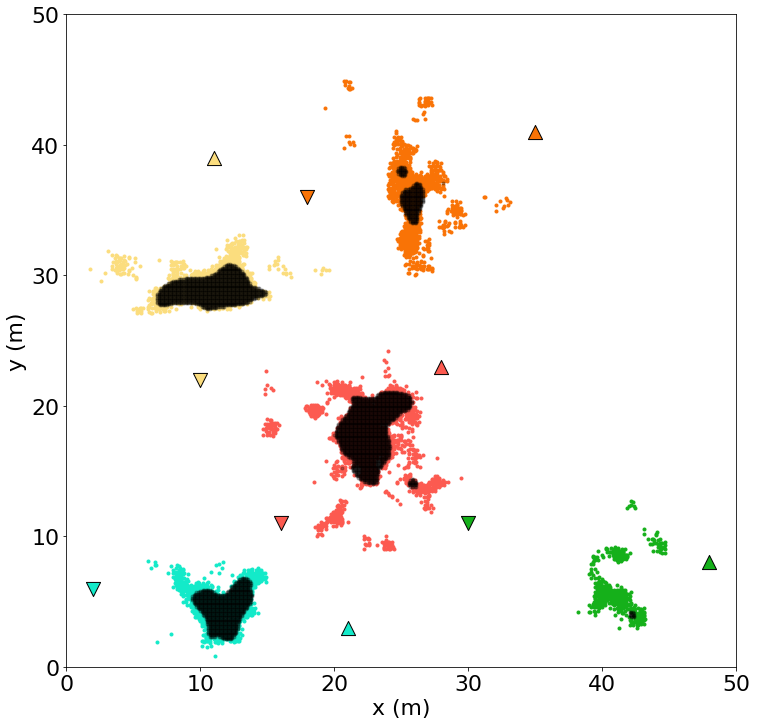

In [6]:
reload(sim)
sim.plotCFwithOverlay(n, tjcps, pjcps, qBase, region)
plt.gca().invert_yaxis()
plt.show()

In [ ]:
reload(sim)
reload(dtr)
dt_sys, AORP = sim.setup_polling_sys(pcs, els, beta, GAMMA_TH, p_th=p_th)

Extracted edges...
Polygons constructed, looking for holes...
Constructed 1 possibly non-convex polygons
8 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 2 possibly non-convex polygons
9 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 1 possibly non-convex polygons
6 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 1 possibly non-convex polygons
1 total subregions
Extracted edges...
Polygons constructed, looking for holes...
Constructed 2 possibly non-convex polygons
3 total subregions
Changed value of parameter NonConvex to 2
   Prev: -1  Min: -1  Max: 2  Default: -1
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (linux64)
Thread count: 1 physical cores, 1 logical processors, using up to 1 threads
Optimize a model with 176 rows, 362 columns and 615 nonzeros
Model fingerprint: 0x1417128f
Model has 10 quadratic constraints
Model has 171 general constraints
Var

 176977 43721    0.04048  422   15    0.09781    0.00000   100%  12.2  105s
*182033 44030             427       0.0944780    0.00000   100%  12.1  108s
H183301 44392                       0.0944780    0.00000   100%  12.1  108s
H184797 44820                       0.0944780    0.00000   100%  12.0  109s
 185373 44984 infeasible  939         0.09448    0.00000   100%  12.0  110s
H185586 45051                       0.0944779    0.00000   100%  12.0  110s
H185830 45125                       0.0944779    0.00000   100%  12.0  110s
H186091 45194                       0.0944779    0.00000   100%  12.0  110s
*188549 44207             345       0.0891525    0.00000   100%  12.0  111s
*188559 44205             345       0.0891524    0.00000   100%  12.0  111s
*188571 44203             345       0.0891523    0.00000   100%  12.0  111s
 194122 45830    0.05727 1225   15    0.08915    0.00000   100%  11.9  115s
*195385 43770             248       0.0820473    0.00000   100%  11.9  115s
 203431 4559

H613133 61941                       0.0237615    0.00000   100%  15.5  403s
H613530 62024                       0.0237609    0.00000   100%  15.5  403s
 615721 62533    0.00000  103   30    0.02376    0.00000   100%  15.5  405s
H619725 63611                       0.0237609    0.00000   100%  15.5  407s
H620307 63807                       0.0237608    0.00000   100%  15.5  408s
 623113 64387    0.00090  165   17    0.02376    0.00000   100%  15.5  410s
H623330 64455                       0.0237575    0.00000   100%  15.5  410s
H623571 64476                       0.0237573    0.00000   100%  15.5  410s
 630674 66349    0.01491  103   19    0.02376    0.00000   100%  15.5  415s
 637385 67466 infeasible   82         0.02376    0.00000   100%  15.5  420s
 643363 67782 infeasible  103         0.02376    0.00000   100%  15.7  425s
 648624 68063    0.02329   97   26    0.02376    0.00000   100%  15.8  430s
H649397 68038                       0.0237572    0.00000   100%  15.8  430s
H652915 6872

 1289579 128987    0.00000  103   24    0.02376    0.00000   100%  17.0  880s
 1295200 129228    0.00000   92   13    0.02376    0.00000   100%  17.0  885s
 1302682 129872    0.00000   61   13    0.02376    0.00000   100%  17.1  890s
 1310395 130611 infeasible  100         0.02376    0.00000   100%  17.1  895s
 1318301 131269 infeasible   70         0.02376    0.00000   100%  17.1  900s
 1324825 131413    0.00000   56   21    0.02376    0.00000   100%  17.1  905s
 1333306 131758    0.00000   76   19    0.02376    0.00000   100%  17.1  910s
 1340348 132492    0.01868   70   19    0.02376    0.00000   100%  17.1  915s
 1346764 132570    0.00000   69   25    0.02376    0.00000   100%  17.2  920s
 1352773 136765    0.00000 2007   11    0.02376    0.00000   100%  17.3  925s
 1360270 142388    0.02368  789   14    0.02376    0.00000   100%  17.4  930s
 1367155 142385 infeasible   83         0.02376    0.00000   100%  17.5  935s
 1374485 142543    0.00000   74   25    0.02376    0.00000   100

 1968994 100634    0.00000 4621   18    0.00421    0.00000   100%  20.3 1385s
 1975924 100936 infeasible   66         0.00421    0.00000   100%  20.3 1390s
 1983058 101112    0.00000   68   21    0.00421    0.00000   100%  20.3 1395s
 1991802 101180 infeasible   73         0.00421    0.00000   100%  20.4 1400s
 1999681 101227    0.00000   53   22    0.00421    0.00000   100%  20.4 1405s
 2007156 101356    0.00000   59   19    0.00421    0.00000   100%  20.4 1410s
 2015046 101530 infeasible   55         0.00421    0.00000   100%  20.4 1415s
 2023238 101536     cutoff  841         0.00421    0.00000   100%  20.4 1420s
 2032519 101537    0.00000   59   23    0.00421    0.00000   100%  20.3 1425s
 2039351 101801    0.00000  254   25    0.00421    0.00000   100%  20.3 1430s
 2046456 102220    0.00000 1604   19    0.00421    0.00000   100%  20.4 1435s
 2053588 102726    0.00000 1048   11    0.00421    0.00000   100%  20.4 1440s
 2060289 102815 infeasible 1545         0.00421    0.00000   100

 2558665 178601    0.00023 3763   17    0.00254    0.00000   100%  21.2 1845s
 2565190 180594    0.00219 3763   13    0.00254    0.00000   100%  21.2 1850s
*2567792 175917            3979       0.0024087    0.00000   100%  21.2 1851s
 2572019 176572    0.00028 3686   14    0.00241    0.00000   100%  21.2 1855s
 2578554 178723     cutoff 3630         0.00241    0.00000   100%  21.2 1860s
 2585048 180637    0.00002 3523   19    0.00241    0.00000   100%  21.2 1865s
 2591586 182725    0.00177 3486    9    0.00241    0.00000   100%  21.2 1870s
 2597973 184460    0.00189 3435   16    0.00241    0.00000   100%  21.2 1875s
 2604073 186164 infeasible 3811         0.00241    0.00000   100%  21.2 1880s
 2610598 187945    0.00157 3252   14    0.00241    0.00000   100%  21.2 1885s
 2616513 190094     cutoff 2853         0.00241    0.00000   100%  21.2 1890s
 2622821 191722    0.00000 2787   14    0.00241    0.00000   100%  21.2 1895s
 2628090 192355    0.00040 3137   13    0.00241    0.00000   100

 3170579 151373    0.00012 5534   14    0.00020    0.00000   100%  22.0 2320s
 3178862 151636     cutoff 5543         0.00020    0.00000   100%  21.9 2325s
 3187470 152706    0.00020 5535   10    0.00020    0.00000   100%  21.9 2330s
 3196207 155175    0.00010 5652   10    0.00020    0.00000   100%  21.9 2335s
*3197603 153161            5693       0.0001864    0.00000   100%  21.9 2335s
 3205445 154219 infeasible 6505         0.00019    0.00000   100%  21.8 2340s
 3215316 156176     cutoff 6733         0.00019    0.00000   100%  21.8 2345s
 3224014 156336 infeasible 6430         0.00019    0.00000   100%  21.8 2350s
 3232157 156915    0.00012 6445   15    0.00019    0.00000   100%  21.7 2355s
 3240910 157212    0.00005 6360   10    0.00019    0.00000   100%  21.7 2360s
 3250124 157936     cutoff 6349         0.00019    0.00000   100%  21.7 2365s
 3257810 158206    0.00015 6290   11    0.00019    0.00000   100%  21.7 2370s
 3264737 159503    0.00010 6298   14    0.00019    0.00000   100

H149405 40099                       0.1221134    0.00000   100%  32.4  159s
H149643 40107                       0.1221133    0.00000   100%  32.4  159s
H149670 40114                       0.1221133    0.00000   100%  32.4  159s
 149897 40147    0.00000   53   27    0.12211    0.00000   100%  32.4  160s
H150015 40165                       0.1221133    0.00000   100%  32.4  160s
 155926 41930    0.11787   73   31    0.12211    0.00000   100%  32.4  165s
 161812 43050 infeasible   54         0.12211    0.00000   100%  32.4  170s
H162465 43125                       0.1221133    0.00000   100%  32.6  171s
H165160 43584                       0.1221132    0.00000   100%  32.5  173s
H165773 43709                       0.1221132    0.00000   100%  32.5  173s
H165936 43736                       0.1221132    0.00000   100%  32.5  173s
 167343 43875    0.01436   72   26    0.12211    0.00000   100%  32.5  175s
H170885 43969                       0.1221130    0.00000   100%  32.4  177s
H173829 4405

H463452 34699                       0.0173329    0.00000   100%  30.0  435s
 469031 34700 infeasible 18100         0.01733    0.00000   100%  30.0  440s
H469486 34701                       0.0173329    0.00000   100%  30.0  440s
H471341 34700                       0.0173329    0.00000   100%  30.0  442s
 474720 34701 infeasible 20945         0.01733    0.00000   100%  29.9  445s
 479410 33875 infeasible 8363         0.01733    0.00000   100%  30.0  450s
 483461 31420 infeasible 9986         0.01733    0.00000   100%  30.0  455s
H483712 31419                       0.0173329    0.00000   100%  30.0  455s
 490095 31420 infeasible 13303         0.01733    0.00000   100%  29.9  460s
H495205 31420                       0.0173329    0.00000   100%  29.9  464s
H496089 31420                       0.0173329    0.00000   100%  29.9  464s
 496214 31421 infeasible 11802         0.01733    0.00000   100%  29.9  465s
 502153 31420    0.00000 14770   15    0.01733    0.00000   100%  29.8  470s
H508049

 925412 31115 infeasible 7330         0.01733    0.00000   100%  27.6  825s
 932227 31118    0.00000 1619   15    0.01733    0.00000   100%  27.5  830s
 938077 31124    0.00000 4547   17    0.01733    0.00000   100%  27.5  835s
 944219 31126 infeasible 16733         0.01733    0.00000   100%  27.5  840s
 952962 31123 infeasible 11984         0.01733    0.00000   100%  27.4  845s
 960596 31123 infeasible 15800         0.01733    0.00000   100%  27.3  850s
 967161 31126    0.00000 1161   15    0.01733    0.00000   100%  27.3  855s
 974191 31126    0.00000 4676   17    0.01733    0.00000   100%  27.3  860s
 980234 31127 infeasible 3139         0.01733    0.00000   100%  27.3  865s
 985411 31124 infeasible 5410         0.01733    0.00000   100%  27.3  870s
H990134 31123                       0.0173329    0.00000   100%  27.3  873s
 991854 31125    0.00000 8631   16    0.01733    0.00000   100%  27.3  875s
 998237 31124    0.00000 20936   15    0.01733    0.00000   100%  27.3  880s
 1006652

 1599297 31688 infeasible 43852         0.01733    0.00000   100%  26.0 1350s
 1604460 31133 infeasible 9670         0.01733    0.00000   100%  26.0 1355s
 1610904 31133 infeasible 12892         0.01733    0.00000   100%  26.0 1360s
 1616732 31127 infeasible 10919         0.01733    0.00000   100%  26.0 1365s
 1623795 31128 infeasible 9892         0.01733    0.00000   100%  26.0 1370s
 1628655 31128 infeasible 12322         0.01733    0.00000   100%  26.0 1375s
 1634678 31131    0.00000 1686   17    0.01733    0.00000   100%  26.0 1380s
 1637985 31136 infeasible 3343         0.01733    0.00000   100%  26.0 1385s
 1642383 31136 infeasible 14950         0.01733    0.00000   100%  26.0 1390s
 1646044 31137    0.00000 16780   16    0.01733    0.00000   100%  26.0 1395s
 1650212 31137 infeasible 2318         0.01733    0.00000   100%  26.0 1400s
 1653963 31142 infeasible 4196         0.01733    0.00000   100%  26.0 1405s
 1658909 31144    0.00000 2109   17    0.01733    0.00000   100%  26.0

 2248250 35743 infeasible 11809         0.01733    0.00000   100%  26.0 1880s
 2255340 35743 infeasible 15354         0.01733    0.00000   100%  26.0 1885s
 2261549 35744 infeasible 18460         0.01733    0.00000   100%  26.0 1890s
 2267724 35745 infeasible 16986         0.01733    0.00000   100%  26.0 1895s
 2273937 35746    0.00000 20092   17    0.01733    0.00000   100%  26.0 1900s
 2280900 35747    0.00000 23575   17    0.01733    0.00000   100%  26.0 1905s
 2287640 35747 infeasible 22384         0.01733    0.00000   100%  26.0 1910s
 2294188 35749    0.00000 25659   15    0.01733    0.00000   100%  26.0 1915s
 2299907 35748 infeasible 28519         0.01733    0.00000   100%  26.0 1920s
 2306265 35750    0.00000 27136   17    0.01733    0.00000   100%  26.0 1925s
 2312691 35750 infeasible 30350         0.01733    0.00000   100%  26.0 1930s
 2318701 35754 infeasible 33358         0.01733    0.00000   100%  26.0 1935s
 2324923 35754 infeasible 31907         0.01733    0.00000   100

H2630722 34515                       0.0158678    0.00000   100%  26.0 2179s
H2631060 34515                       0.0158678    0.00000   100%  26.0 2179s
H2631242 34515                       0.0158677    0.00000   100%  26.0 2179s
 2631451 34516 infeasible 17378         0.01587    0.00000   100%  26.0 2180s
H2631554 34515                       0.0158677    0.00000   100%  26.0 2180s
H2631970 34515                       0.0158677    0.00000   100%  26.0 2180s
H2632438 34515                       0.0158677    0.00000   100%  26.0 2180s
H2636780 34515                       0.0158677    0.00000   100%  26.0 2184s
H2636806 34515                       0.0158676    0.00000   100%  26.0 2184s
 2637813 34516 infeasible 20559         0.01587    0.00000   100%  26.0 2185s
H2638080 34515                       0.0158675    0.00000   100%  26.0 2185s
H2639510 34515                       0.0158675    0.00000   100%  26.0 2186s
H2639745 34516                       0.0158675    0.00000   100%  26.0 218

 3000224 34557 infeasible 42245         0.01587    0.00000   100%  26.0 2480s
 3007266 34557 infeasible 45766         0.01587    0.00000   100%  26.0 2485s
H3009351 34556                       0.0158660    0.00000   100%  26.0 2486s
H3009455 34556                       0.0158659    0.00000   100%  26.0 2486s
H3012133 34556                       0.0158659    0.00000   100%  26.0 2488s
 3014117 34552 infeasible 3569         0.01587    0.00000   100%  26.0 2490s
H3014136 34551                       0.0158659    0.00000   100%  26.0 2490s
 3020357 34552 infeasible 6689         0.01587    0.00000   100%  26.0 2495s
 3026817 34552 infeasible 9919         0.01587    0.00000   100%  26.0 2500s
 3033477 34552 infeasible 13249         0.01587    0.00000   100%  26.0 2505s
 3040043 34552 infeasible 16532         0.01587    0.00000   100%  26.0 2510s
 3046711 34552 infeasible 19866         0.01587    0.00000   100%  26.0 2515s
 3053651 34552 infeasible 23336         0.01587    0.00000   100%  26.0

H3406616 34535                       0.0158651    0.00000   100%  25.9 2799s
H3406928 34535                       0.0158651    0.00000   100%  25.9 2799s
 3407363 34536 infeasible 17705         0.01587    0.00000   100%  25.9 2800s
H3408748 34535                       0.0158651    0.00000   100%  25.9 2801s
 3413373 34536 infeasible 20710         0.01587    0.00000   100%  25.9 2805s
 3419659 34536 infeasible 23853         0.01587    0.00000   100%  25.9 2810s
H3424623 34536                       0.0158650    0.00000   100%  25.9 2814s
H3424728 34535                       0.0158650    0.00000   100%  25.9 2814s
 3425749 34540 infeasible 26899         0.01586    0.00000   100%  25.9 2815s
H3425956 34535                       0.0158650    0.00000   100%  25.9 2815s
H3425983 34536                       0.0158649    0.00000   100%  25.9 2815s
H3428001 34536                       0.0158649    0.00000   100%  25.9 2816s
 3431407 34538 infeasible 29728         0.01586    0.00000   100%  25.9 

H3931624 34520                       0.0158634    0.00000   100%  25.9 3250s
 3935942 34522 infeasible 26568         0.01586    0.00000   100%  25.9 3255s
 3940672 34522 infeasible 28933         0.01586    0.00000   100%  25.9 3260s
 3945295 34523 infeasible 31246         0.01586    0.00000   100%  25.9 3265s
 3949924 34524    0.00000 33560   17    0.01586    0.00000   100%  25.9 3270s
 3954594 34524 infeasible 31334         0.01586    0.00000   100%  25.9 3275s
 3959381 34525    0.00000 33727   17    0.01586    0.00000   100%  25.9 3280s
H3963088 34524                       0.0158633    0.00000   100%  25.9 3283s
 3964060 34526    0.00000 36068   17    0.01586    0.00000   100%  25.9 3285s
 3968782 34526    0.00000 38429   17    0.01586    0.00000   100%  25.9 3290s
 3973584 34526 infeasible 36269         0.01586    0.00000   100%  25.9 3295s
H3975439 34525                       0.0158632    0.00000   100%  25.9 3296s
 3978156 34526 infeasible 38555         0.01586    0.00000   100%  

 4353013 34520    0.00000 34549   15    0.01586    0.00000   100%  25.8 3685s
 4357538 34519 infeasible 36812         0.01586    0.00000   100%  25.8 3690s
 4362264 34519 infeasible 39175         0.01586    0.00000   100%  25.8 3695s
 4367166 34519 infeasible 41626         0.01586    0.00000   100%  25.8 3700s
 4372238 34519 infeasible 44162         0.01586    0.00000   100%  25.8 3705s
 4377356 34519 infeasible 46721         0.01586    0.00000   100%  25.8 3710s
 4382464 34515 infeasible 3653         0.01586    0.00000   100%  25.8 3715s
 4387455 34516    0.00000 6148   17    0.01586    0.00000   100%  25.8 3720s
 4392606 34515 infeasible 8724         0.01586    0.00000   100%  25.8 3725s
 4398347 34516    0.00000 11594   16    0.01586    0.00000   100%  25.8 3730s
 4403490 34515 infeasible 14166         0.01586    0.00000   100%  25.8 3735s
 4408364 34515 infeasible 16603         0.01586    0.00000   100%  25.8 3740s
 4413122 34515 infeasible 18982         0.01586    0.00000   100%  

 4864974 39081 infeasible 32781         0.01586    0.00000   100%  25.7 4200s
 4869616 39081 infeasible 35102         0.01586    0.00000   100%  25.7 4205s
 4874299 39082 infeasible 37447         0.01586    0.00000   100%  25.8 4210s
 4878977 39082 infeasible 39786         0.01586    0.00000   100%  25.8 4215s
 4883453 39084 infeasible 37461         0.01586    0.00000   100%  25.8 4220s
 4888148 39085 infeasible 39808         0.01586    0.00000   100%  25.8 4225s
 4893456 39085 infeasible 42466         0.01586    0.00000   100%  25.7 4230s
 4898719 39086 infeasible 40534         0.01586    0.00000   100%  25.7 4235s
 4903713 39086 infeasible 43031         0.01586    0.00000   100%  25.7 4240s
 4909092 39087 infeasible 45724         0.01586    0.00000   100%  25.7 4245s
 4913744 39087 infeasible 48050         0.01586    0.00000   100%  25.7 4250s
 4918717 39088 infeasible 45973         0.01586    0.00000   100%  25.7 4255s
 4923573 39088 infeasible 48401         0.01586    0.00000   100

 5321003 34547 infeasible 12251         0.01586    0.00000   100%  25.7 4680s
 5326336 34548 infeasible 14919         0.01586    0.00000   100%  25.7 4685s
 5330992 34550    0.00000 12685   15    0.01586    0.00000   100%  25.7 4690s
 5335775 34549 infeasible 15077         0.01586    0.00000   100%  25.7 4695s
 5340552 34550 infeasible 17467         0.01586    0.00000   100%  25.7 4700s
 5344842 34550 infeasible 19612         0.01586    0.00000   100%  25.7 4705s
 5349579 34551 infeasible 17419         0.01586    0.00000   100%  25.7 4710s
 5354289 34551 infeasible 19774         0.01586    0.00000   100%  25.7 4715s
 5359282 34552 infeasible 22272         0.01586    0.00000   100%  25.7 4720s
 5364544 34552 infeasible 24903         0.01586    0.00000   100%  25.7 4725s
H5369266 34552                       0.0158599    0.00000   100%  25.7 4729s
 5369561 34553 infeasible 22850         0.01586    0.00000   100%  25.7 4730s
 5374633 34553 infeasible 25386         0.01586    0.00000   100%

 5801501 34537 infeasible 33618         0.01586    0.00000   100%  25.7 5180s
 5806189 34537 infeasible 35962         0.01586    0.00000   100%  25.7 5185s
 5810745 34537 infeasible 38240         0.01586    0.00000   100%  25.7 5190s
 5815635 34537 infeasible 40685         0.01586    0.00000   100%  25.7 5195s
 5820881 34537 infeasible 43308         0.01586    0.00000   100%  25.7 5200s
 5826293 34537 infeasible 46014         0.01586    0.00000   100%  25.7 5205s
 5830856 34538    0.00000 48295   16    0.01586    0.00000   100%  25.7 5210s
 5835482 34538    0.00000 4968   17    0.01586    0.00000   100%  25.7 5215s
 5839774 34538    0.00000 7114   16    0.01586    0.00000   100%  25.7 5220s
 5844567 34537 infeasible 9511         0.01586    0.00000   100%  25.7 5225s
 5849595 34537 infeasible 12025         0.01586    0.00000   100%  25.7 5230s
 5854597 34537 infeasible 14526         0.01586    0.00000   100%  25.7 5235s
 5859491 34537 infeasible 16973         0.01586    0.00000   100%  

 6244875 34563 infeasible 13558         0.01586    0.00000   100%  25.8 6460s
 6249181 34563 infeasible 15711         0.01586    0.00000   100%  25.8 6465s
 6253582 34564 infeasible 17915         0.01586    0.00000   100%  25.8 6470s
 6258200 34564 infeasible 20224         0.01586    0.00000   100%  25.8 6475s
 6262757 34565 infeasible 17939         0.01586    0.00000   100%  25.8 6480s
 6267358 34566    0.00000 20239   15    0.01586    0.00000   100%  25.8 6485s
 6272120 34566 infeasible 22624         0.01586    0.00000   100%  25.8 6490s
 6276764 34566 infeasible 24946         0.01586    0.00000   100%  25.8 6495s
 6281409 34567 infeasible 22705         0.01586    0.00000   100%  25.8 6500s
 6286055 34567 infeasible 25028         0.01586    0.00000   100%  25.8 6505s
 6290626 34568 infeasible 27317         0.01586    0.00000   100%  25.8 6510s
 6294988 34568 infeasible 29498         0.01586    0.00000   100%  25.8 6515s
 6299259 34569 infeasible 27070         0.01586    0.00000   100

 6691301 39101 infeasible 38357         0.01586    0.00000   100%  25.8 6950s
H6694587 39101                       0.0158594    0.00000   100%  25.9 6953s
 6695582 39102 infeasible 35910         0.01586    0.00000   100%  25.9 6955s
 6700072 39102 infeasible 38155         0.01586    0.00000   100%  25.9 6960s
 6704737 39103 infeasible 40515         0.01586    0.00000   100%  25.9 6965s
 6709509 39105 infeasible 42902         0.01586    0.00000   100%  25.8 6970s
 6714402 39108 infeasible 40762         0.01586    0.00000   100%  25.8 6975s
 6719376 39108 infeasible 43249         0.01586    0.00000   100%  25.8 6980s
 6724477 39109 infeasible 45827         0.01586    0.00000   100%  25.8 6985s
 6728911 39109 infeasible 48044         0.01586    0.00000   100%  25.8 6990s
 6733554 39110 infeasible 45778         0.01586    0.00000   100%  25.8 6995s
 6737934 39110 infeasible 47968         0.01586    0.00000   100%  25.8 7000s
 6740937 38177 infeasible 7037         0.01586    0.00000   100% 

 7134583 34533    0.00000 11429   17    0.01586    0.00000   100%  25.9 7450s
 7139015 34533 infeasible 9050         0.01586    0.00000   100%  25.9 7455s
 7143572 34534    0.00000 11328   17    0.01586    0.00000   100%  25.9 7460s
 7147914 34534 infeasible 13535         0.01586    0.00000   100%  25.9 7465s
 7152223 34535    0.00000 15689   17    0.01586    0.00000   100%  25.9 7470s
 7156586 34536    0.00000 13275   17    0.01586    0.00000   100%  25.9 7475s
 7161213 34535 infeasible 15589         0.01586    0.00000   100%  25.9 7480s
 7165760 34536 infeasible 17898         0.01586    0.00000   100%  25.9 7485s
 7170160 34536 infeasible 20098         0.01586    0.00000   100%  25.9 7490s
 7174129 34537 infeasible 17487         0.01586    0.00000   100%  25.9 7495s
 7178587 34537 infeasible 19716         0.01586    0.00000   100%  25.9 7500s
 7183166 34538 infeasible 22041         0.01586    0.00000   100%  25.9 7505s
 7187864 34538 infeasible 24390         0.01586    0.00000   100%

 7600247 37107    0.00000 23299   16    0.01586    0.00000   100%  25.9 10660s
 7605046 37106 infeasible 25699         0.01586    0.00000   100%  25.9 10665s
 7609962 37106 infeasible 28157         0.01586    0.00000   100%  25.9 10670s
 7614478 37106 infeasible 30415         0.01586    0.00000   100%  25.9 10675s
 7618736 37106 infeasible 32544         0.01586    0.00000   100%  25.9 10680s
 7623039 37107    0.00000 34695   17    0.01586    0.00000   100%  25.9 10685s
 7626814 37106 infeasible 36583         0.01586    0.00000   100%  25.9 10690s
 7631122 37106 infeasible 38737         0.01586    0.00000   100%  25.9 10695s
 7635999 37107    0.00000 41175   17    0.01586    0.00000   100%  25.9 10700s
 7641174 37106 infeasible 43763         0.01586    0.00000   100%  25.9 10705s
H7645397 37041                       0.0158594    0.00000   100%  25.9 10709s
 7645976 37042 infeasible 19052         0.01586    0.00000   100%  25.9 10710s
 7650800 37042 infeasible 21464         0.01586    0.

 8049639 37067 infeasible 23066         0.01586    0.00000   100%  25.9 11160s
 8054252 37068    0.00000 25372   15    0.01586    0.00000   100%  25.9 11165s
 8058852 37068 infeasible 27674         0.01586    0.00000   100%  25.9 11170s
 8063692 37068 infeasible 30094         0.01586    0.00000   100%  25.9 11175s
 8068031 37069 infeasible 27702         0.01586    0.00000   100%  25.9 11180s
 8072155 37069 infeasible 29764         0.01586    0.00000   100%  25.9 11185s
 8076370 37070 infeasible 31873         0.01586    0.00000   100%  25.9 11190s
 8080533 37075    0.00000 33956   17    0.01586    0.00000   100%  25.9 11195s
 8084824 37072 infeasible 31539         0.01586    0.00000   100%  25.9 11200s
 8089131 37073    0.00000 33692   17    0.01586    0.00000   100%  25.9 11205s
 8093357 37073 infeasible 35807         0.01586    0.00000   100%  25.9 11210s
 8097657 37073 infeasible 37957         0.01586    0.00000   100%  25.9 11215s
 8101952 37074 infeasible 35543         0.01586    0

 8517210 42146    0.00000 3058   16    0.01586    0.00000   100%  25.9 11675s
 8521189 42193 infeasible 5047         0.01586    0.00000   100%  25.9 11680s
 8525049 42193 infeasible 6977         0.01586    0.00000   100%  25.9 11685s
 8532008 42188    0.00000 3362   18    0.01586    0.00000   100%  25.9 11690s
 8538399 42191 infeasible 2000         0.01586    0.00000   100%  25.9 11695s
 8545078 42194 infeasible 5339         0.01586    0.00000   100%  25.9 11700s
 8551456 42196    0.00000 8529   15    0.01586    0.00000   100%  25.9 11705s
 8557415 42155 infeasible 5536         0.01586    0.00000   100%  25.9 11710s
 8563267 42155    0.00000 8462   16    0.01586    0.00000   100%  25.8 11715s
 8568658 42154 infeasible 11158         0.01586    0.00000   100%  25.8 11720s
 8575044 42154 infeasible 14351         0.01586    0.00000   100%  25.8 11725s
 8581668 42154 infeasible 17663         0.01586    0.00000   100%  25.8 11730s
 8588207 42155    0.00000 20932   17    0.01586    0.00000   

 9019781 50894 infeasible 48284         0.00882    0.00000   100%  25.5 12155s
 9023950 50917 infeasible 1461         0.00882    0.00000   100%  25.5 12160s
 9029245 50918    0.00000 4108   16    0.00882    0.00000   100%  25.5 12165s
 9034885 50918    0.00000 6926   16    0.00882    0.00000   100%  25.5 12170s
H9040421 50916                       0.0088170    0.00000   100%  25.5 12174s
 9041450 50917 infeasible 10209         0.00882    0.00000   100%  25.5 12175s
 9048216 50917 infeasible 13592         0.00882    0.00000   100%  25.5 12180s
 9055121 50918    0.00000 17044   16    0.00882    0.00000   100%  25.5 12185s
 9061510 50917 infeasible 20239         0.00882    0.00000   100%  25.5 12190s
 9068260 50917 infeasible 23614         0.00882    0.00000   100%  25.5 12195s
 9074271 50918    0.00000 26619   17    0.00882    0.00000   100%  25.5 12200s
 9080647 50918    0.00000 29807   17    0.00882    0.00000   100%  25.5 12205s
 9087468 50917 infeasible 33218         0.00882    0.000

 9469519 55544 infeasible 24166         0.00882    0.00000   100%  25.4 12620s
H9470806 55543                       0.0088170    0.00000   100%  25.4 12621s
H9473302 55543                       0.0088170    0.00000   100%  25.4 12624s
 9473805 55544 infeasible 26309         0.00882    0.00000   100%  25.4 12625s
 9478515 55544 infeasible 28664         0.00882    0.00000   100%  25.4 12630s
 9483624 55545    0.00000 31218   16    0.00882    0.00000   100%  25.4 12635s
H9485132 55543                       0.0088170    0.00000   100%  25.4 12636s
H9486952 55543                       0.0088170    0.00000   100%  25.4 12638s
H9487524 55543                       0.0088170    0.00000   100%  25.4 12639s
H9487576 55543                       0.0088170    0.00000   100%  25.4 12639s
 9488101 55544 infeasible 33457         0.00882    0.00000   100%  25.4 12640s
 9492111 55544 infeasible 35462         0.00882    0.00000   100%  25.4 12645s
 9496129 55544 infeasible 37471         0.00882    0.00000

 9795409 55572 infeasible 27523         0.00882    0.00000   100%  25.5 13075s
 9798393 55572 infeasible 29015         0.00882    0.00000   100%  25.5 13080s
 9800933 55572 infeasible 30285         0.00882    0.00000   100%  25.5 13085s
 9803257 55572 infeasible 31447         0.00882    0.00000   100%  25.5 13090s
 9805719 55572 infeasible 32678         0.00882    0.00000   100%  25.5 13095s
 9808614 55573    0.00000 34125   16    0.00882    0.00000   100%  25.5 13100s
 9811619 55572 infeasible 35628         0.00882    0.00000   100%  25.5 13105s
 9814768 55573    0.00000 37202   17    0.00882    0.00000   100%  25.5 13110s
 9817065 55572 infeasible 38351         0.00882    0.00000   100%  25.5 13115s
 9819155 55572 infeasible 39396         0.00882    0.00000   100%  25.5 13120s
 9820736 55573    0.00000 40186   15    0.00882    0.00000   100%  25.5 13125s
 9822591 55572 infeasible 41114         0.00882    0.00000   100%  25.5 13130s
 9824947 55572 infeasible 42292         0.00882    0

In [ ]:
reload(sim)
reload(dtr)
dt_sys, AORP = sim.setup_polling_sys(pcs, els, beta, GAMMA_TH, p_th=p_th)

In [ ]:
reload(sim)
sim.plot_AORP(dt_sys, AORP, tjcps, pjcps, qBase, region)

In [ ]:
reload(sim)
motion_power = motion.LinearMotionPower(7.2, 0.29)
hrs = 1; mins = 0; seconds = 0;
ps = dt_sys.ps
AORP_res, AORP_xt, cyrp_res, cyrp_xt, rtable_res, rtable_xt = sim.run_sims(ps, AORP, hrs, mins, seconds, motion_power, MOBILE_TX_POWER.W)